<a href="https://colab.research.google.com/github/lightituphome/Beauty-Random-Forest-Regression-/blob/main/beauty(Random_Forest_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving beauty.csv to beauty.csv


{'beauty.csv': b'wage,exper,union,goodhlth,black,female,married,service,educ,looks\n5.73,30,0,1,0,1,1,1,14,4\n4.28,28,0,1,0,1,1,0,12,3\n7.96,35,0,1,0,1,0,0,10,4\n11.57,38,0,1,0,0,1,1,16,3\n11.42,27,0,1,0,0,1,0,16,3\n3.91,20,0,0,0,1,1,0,12,3\n8.76,12,0,1,0,0,1,0,16,3\n7.69,5,1,1,0,0,0,0,16,4\n5,5,0,1,0,1,0,0,16,3\n3.89,12,0,1,0,1,0,0,12,3\n3.45,3,0,1,0,1,0,0,12,4\n4.03,6,0,1,0,0,1,0,16,4\n5.14,19,0,1,0,0,1,1,17,2\n3,8,0,1,0,0,0,1,16,3\n7.99,12,0,1,0,0,1,0,16,4\n6.01,17,0,1,0,0,1,0,16,4\n5.16,7,0,1,0,0,1,0,17,3\n11.54,12,0,1,0,0,1,1,17,4\n10.44,10,0,1,0,1,0,0,17,4\n7.69,7,0,1,0,1,1,1,16,3\n7.69,7,1,1,0,0,0,0,17,4\n6.79,19,0,1,0,0,1,1,14,3\n6.87,33,0,1,0,0,1,1,12,3\n17.03,32,0,1,0,0,1,0,13,3\n10.05,12,0,1,0,0,1,0,13,4\n15.81,24,0,1,0,0,1,1,17,4\n14.84,29,0,1,0,0,0,1,13,5\n19.08,17,0,1,0,0,0,0,17,5\n8.35,41,0,0,0,0,1,1,16,1\n9.62,40,0,0,0,0,1,0,16,3\n5.96,10,0,1,0,0,1,0,14,3\n5.73,43,0,0,0,0,1,0,10,3\n6.73,41,0,1,0,0,1,0,10,4\n8.17,18,0,1,0,0,1,0,16,2\n12.39,28,0,1,0,0,1,0,12,4\n9.62,37,0,

In [ ]:
beauty=pd.read_csv('beauty.csv')

In [ ]:
beauty

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [ ]:
beauty.shape

(1260, 10)

In [ ]:
beauty.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [ ]:
beauty.tail()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3
1259,1.92,24,0,0,0,1,0,1,16,3


In [ ]:
beauty.isnull().sum()

wage        0
exper       0
union       0
goodhlth    0
black       0
female      0
married     0
service     0
educ        0
looks       0
dtype: int64

In [ ]:
beauty.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


Correlation

1.positive correlation

2.negative correlation

In [ ]:
correlation=beauty.corr()

<Axes: >

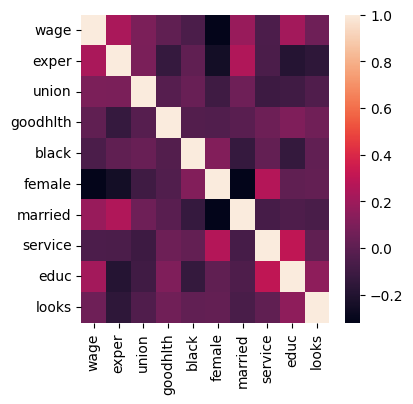

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(beauty.corr())

Splitting the features and target

In [ ]:
x=beauty.drop(['looks'],axis=1)
y=beauty['looks']

In [ ]:
print(x)

       wage  exper  union  goodhlth  black  female  married  service  educ
0      5.73     30      0         1      0       1        1        1    14
1      4.28     28      0         1      0       1        1        0    12
2      7.96     35      0         1      0       1        0        0    10
3     11.57     38      0         1      0       0        1        1    16
4     11.42     27      0         1      0       0        1        0    16
...     ...    ...    ...       ...    ...     ...      ...      ...   ...
1255   1.61     25      0         1      1       1        0        1    12
1256   1.68      4      0         1      0       1        1        1    12
1257   3.29     35      0         1      1       1        0        1    12
1258   2.31     15      0         1      1       1        1        1    10
1259   1.92     24      0         0      0       1        0        1    16

[1260 rows x 9 columns]


In [ ]:
print(y)

0       4
1       3
2       4
3       3
4       3
       ..
1255    3
1256    2
1257    3
1258    3
1259    3
Name: looks, Length: 1260, dtype: int64


In [ ]:
beauty.value_counts('looks')

looks
3    722
4    364
2    142
5     19
1     13
dtype: int64

Splitting training and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1260, 9) (1008, 9) (252, 9)


In [ ]:
print(x_train)

       wage  exper  union  goodhlth  black  female  married  service  educ
663    3.08      5      0         1      0       0        1        0    13
1175   4.74      8      0         1      0       1        0        1    13
881    4.27     44      0         0      0       0        1        1    12
286    6.15      7      0         1      0       0        1        1    17
1098   5.92     34      0         1      0       0        1        0    12
...     ...    ...    ...       ...    ...     ...      ...      ...   ...
466    6.11     44      0         1      0       1        1        0    13
299   26.24     24      0         1      0       0        1        0    12
493    3.85      7      1         1      0       1        0        0    10
527    4.67      4      0         1      0       0        0        0    10
1192   3.46     30      0         1      0       1        0        0    10

[1008 rows x 9 columns]


In [ ]:
print(y_train)

663     4
1175    4
881     4
286     3
1098    2
       ..
466     3
299     3
493     4
527     3
1192    3
Name: looks, Length: 1008, dtype: int64


Model Training

In [ ]:
model=RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: -0.1318226922629051


In [ ]:
y_test=list(y_test)

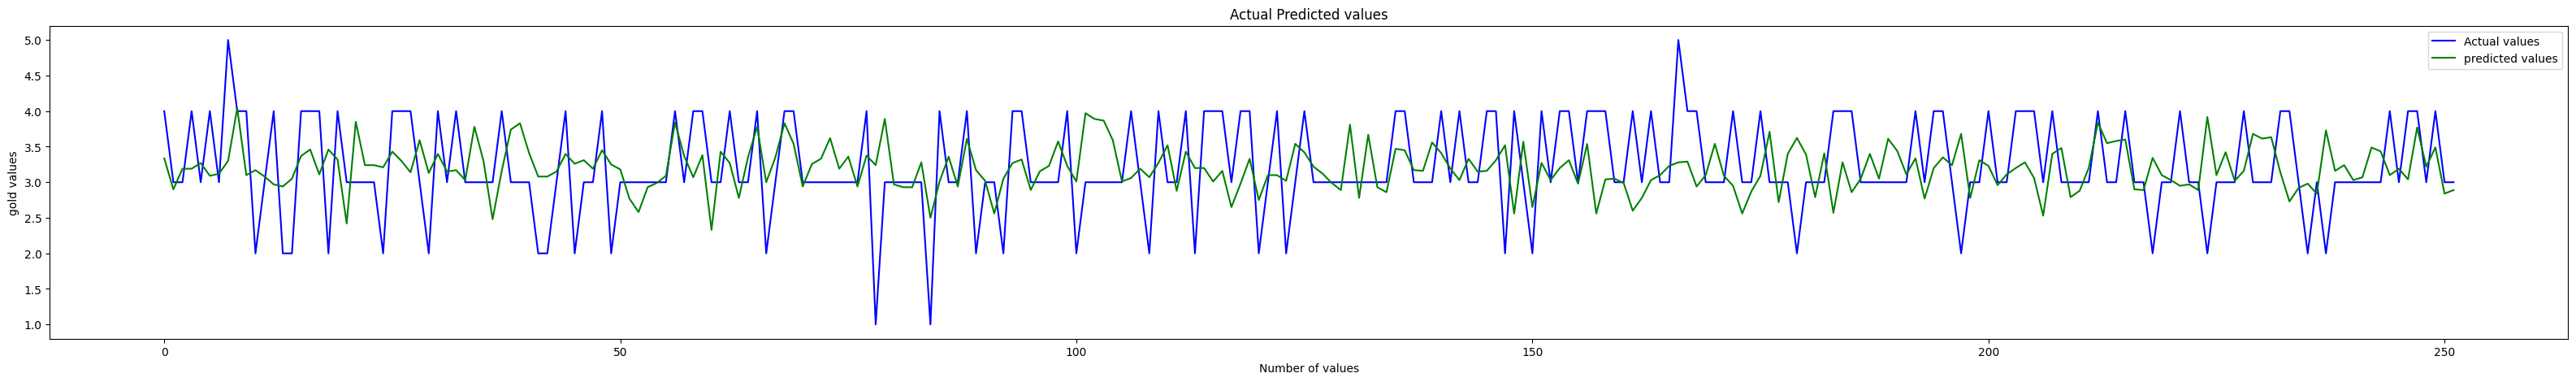

In [ ]:
plt.figure(figsize=(40,5))
plt.plot(y_test,color='blue',label='Actual values')
plt.plot(test_data_prediction,color='green',label='predicted values')
plt.title('Actual Predicted values')
plt.xlabel('Number of values')
plt.ylabel('gold values')
plt.legend()
plt.show()

In [ ]:
input_data=(5.14,19,0,1,0,0,1,1,17)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[2.47]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction[0]==5):
  print("The person looks beautiful")
else:
  print("The person is pretty")

The person is pretty
